In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_object(points: np.ndarray):
    plt.hlines(y=0, xmin=-3, xmax=3, color='black')
    plt.vlines(x=0, ymin=-3, ymax=3, color='black')
    plt.scatter(points[0, :], points[1, :], c='black')

    for i in range(points.shape[1]):
        x1, y1 = points[:, i]
        x2, y2 = points[:, (i+1) % points.shape[1]]
        plt.plot([x1, x2], [y1, y2], c='r')    

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [3]:
p1 = np.array([0, 0])
p2 = np.array([1.5, .5])
p3 = np.array([3, 0])
p4 = np.array([1.5, 2])

points = np.vstack([p1, p2, p3, p4]).T
points

array([[0. , 1.5, 3. , 1.5],
       [0. , 0.5, 0. , 2. ]])

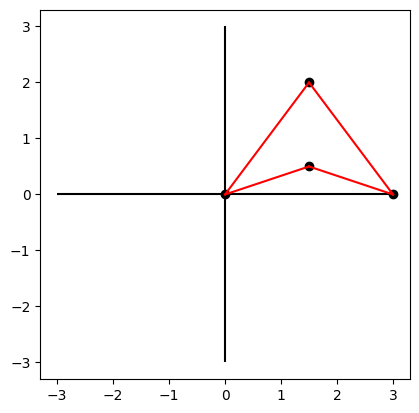

In [4]:
plot_object(points)

In [5]:
def to_homogenous_points(points: np.ndarray):
    return np.vstack((points, np.ones((1, points.shape[1]))))

In [6]:
def get_shift_matrix(x: float, y: float):
    return np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])

In [7]:
def get_rotation_matrix(angle: float):
    rad = np.deg2rad(angle)
    return np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])

In [8]:
def shift_points(x: float, y: float, points: np.ndarray):
    M = get_shift_matrix(x, y)
    return M @ points

In [9]:
def rotate_points(angle: float, points: np.ndarray):
    M = get_rotation_matrix(angle)
    return M @ points

In [10]:
def rotate_triangle(triangle_points: np.ndarray, angle: float):
    x_mean, y_mean = points.mean(axis=1)

    transformed_points = to_homogenous_points(triangle_points)
    transformed_points = shift_points(x=-x_mean, y=- y_mean, points=transformed_points)
    transformed_points = rotate_points(angle, transformed_points)
    transformed_points = shift_points(x=x_mean, y= y_mean, points=transformed_points)

    return transformed_points[0:2, :]

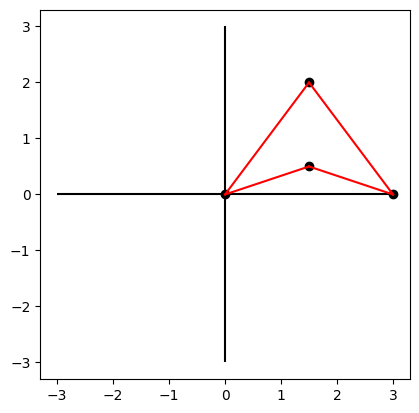

In [19]:
rotated_triangle_points = rotate_triangle(points, 0)
plot_object(rotated_triangle_points)